In [1]:
import dcor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# References:
# Model-free feature screening for ultrahigh-dimensional data: screening threshold
# Measuring and testing independence by correlation of distances: DC
# Feature screening via distance correlation learning: feature selection

In [8]:
model_name = '5.iw.mullion.light.shanghai.train'
file_loc = './state_correlation_test/' + model_name + '.res.csv';
states_pd = pd.read_csv(file_loc, index_col = 0, skiprows = 3)


In [9]:
states_pd

,Environment,Environment.1,Environment.2,Environment.3,EMS,EMS.1,EMS.2,EMS.3,EMS.4,TEMPHWLOOP SUPPLY SIDE OUTLET,EMS.5
2002/1/1 0:10,6.083333,80.166667,0.0,0.0,19.0,20.265501,-0.747944,0,1,25.0,28.966521
2002/1/1 0:20,6.466667,78.333333,0.0,0.0,19.0,20.267301,-0.753239,0,1,25.0,25.102790
2002/1/1 0:30,6.850000,76.500000,0.0,0.0,19.0,20.260627,-0.744133,0,1,45.0,38.191643
2002/1/1 0:40,7.233333,74.666667,0.0,0.0,19.0,20.271828,-0.725673,0,1,45.0,43.282610
2002/1/1 0:50,7.616667,72.833333,0.0,0.0,19.0,20.323032,-0.695993,0,1,55.0,62.179082
2002/1/1 1:00,8.000000,71.000000,0.0,0.0,19.0,20.451188,-0.639594,0,1,55.0,61.335079
2002/1/1 1:10,8.066667,71.333333,0.0,0.0,19.0,20.670469,-0.601835,0,1,50.0,49.666291
2002/1/1 1:20,8.133333,71.666667,0.0,0.0,19.0,20.993940,-0.575621,0,1,50.0,39.820817
2002/1/1 1:30,8.200000,72.000000,0.0,0.0,19.0,21.170345,-0.654531,0,1,50.0,0.000000
2002/1/1 1:40,8.266667,72.333333,0.0,0.0,19.0,20.992524,-0.732477,0,1,50.0,0.000000


In [10]:
states_ay = states_pd.values
#states_ay[:,9] = states_ay[:,9]/200000
#states_ay[:,2] = states_ay[:,2]/300
#states_ay[:,1] = states_ay[:,1]/100
#states_ay[:,3] = states_ay[:,3]/1000
#states_ay = states_ay[:, [0,1,2,3,4,5,6,7,8,9]]

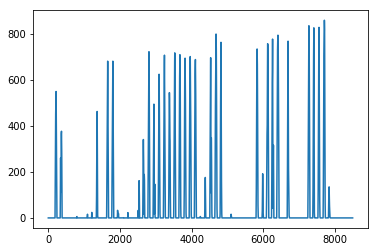

In [11]:
plt.plot(states_ay[:, 3])

In [12]:
def get_prcd_states_single(states_ay, time_back):
    states_x = states_ay[0:-time_back, :]
    states_y = states_ay[time_back:, :]
    return (states_x, states_y, dcor.distance_stats(states_x, states_y))

In [13]:
single_dcors = [];
for time_i in range(1, 50):
    print(time_i)
    single_dcors.append(get_prcd_states_single(states_ay, time_i)[2].correlation_xy)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [14]:
np.savetxt('./state_correlation_test/' + model_name + '.dcor.csv', single_dcors)

In [15]:
single_dcors

[0.995834502055816,
 0.9874014368272059,
 0.9751330152836628,
 0.9589566081353282,
 0.9392947906371172,
 0.9166184418907021,
 0.8913549382617297,
 0.8639256575173474,
 0.8346674987539233,
 0.8039413607224741,
 0.7720501623780963,
 0.7392906484703637,
 0.7058803828533298,
 0.6719984810378639,
 0.6377581243737059,
 0.6033017683991615,
 0.5687457334045132,
 0.534247082766625,
 0.49991563216244733,
 0.4658898502842881,
 0.4323023348869205,
 0.3993223369522743,
 0.36711841422789687,
 0.3359146968719719,
 0.3059315545604465,
 0.2774326687730965,
 0.250674283715445,
 0.226081976130266,
 0.2041245266917884,
 0.18537570184979762,
 0.17039392436137793,
 0.15980191683606573,
 0.1539382404756839,
 0.15286345587044514,
 0.1560705573396402,
 0.1629000244702248,
 0.17243093608814744,
 0.1838344588615967,
 0.19633250734779772,
 0.20938779135027508,
 0.2225379351143637,
 0.23546915848510833,
 0.24786541396975215,
 0.2595621694609835,
 0.2704177646213897,
 0.2803768599873737,
 0.28933821818403066,
 0.29

In [142]:
def get_aux_states_single(states_ay):
    mean = np.mean(states_ay)
    std = np.std(states_ay)
    states_x = np.random.normal(mean, std, size = states_ay.shape);
    states_y = states_ay;
    return (states_x, states_y, dcor.distance_stats(states_x, states_y))

In [191]:
single_dcors

[0.996252628753445,
 0.9870716149259298,
 0.9733607178315145,
 0.9559530292728831,
 0.9356610040252185,
 0.9132860662977248,
 0.8894623866019101,
 0.8644395917425268,
 0.8384317447079863,
 0.8116439905343995,
 0.7842287145698006,
 0.7563166800102115,
 0.7280326059020734,
 0.6994724909491921,
 0.6706885668385972,
 0.6417080875562078,
 0.6125627212210325,
 0.5832651204262884,
 0.553844127560707,
 0.5243857120041462,
 0.49498899112003153,
 0.46572857053799616,
 0.4367387998075701,
 0.4081532070937671,
 0.3801021322244334,
 0.35269068651548485,
 0.32600473296678184,
 0.30016196801866774,
 0.27528866625618736,
 0.25155623448100217,
 0.22915198789464608,
 0.20832731176519287,
 0.18940621491767082,
 0.17275148394171358,
 0.1588278901829992,
 0.1481116101770661,
 0.14104876996359572,
 0.13791128778373524,
 0.13868189714040485,
 0.14301810247543326,
 0.1503567697052787,
 0.16001071086335242,
 0.1713410947756923,
 0.18375305920185622,
 0.19676755687184866,
 0.21001852590880882,
 0.22319461947850

In [197]:
def get_idx_with_thres(dcors, thres):
    idx = 1;
    for dcor in dcors:
        if dcor < thres:
            break;
        idx += 1;
    return idx;

In [207]:
get_idx_with_thres(single_dcors, 0.5)

35

In [158]:
def get_prcd_states_stack(states_ay, time_back):
    states_y = states_ay[time_back:, :];
    states_x = [];
    for line_i in range(states_ay.shape[0]):
        if (states_ay.shape[0] - line_i) >= (time_back + 1):
            states_x.append(states_ay[line_i: line_i + time_back].flatten().tolist());
    states_x = np.array(states_x);
    return (states_x, states_y, dcor.distance_stats(states_x, states_y))

In [160]:
stack_dcors = [];
for time_i in range(1, 144):
    stack_dcors.append(get_prcd_states_stack(states_ay, time_i)[2].correlation_xy)

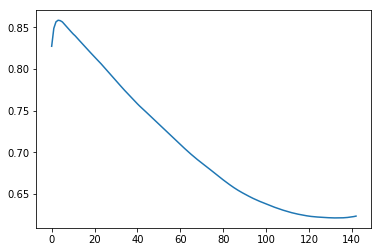

In [195]:
plt.plot(stack_dcors)

In [161]:
stats

Stats(covariance_xy=11907.01607774836, correlation_xy=0.8579947319025889, variance_x=18957.465013247333, variance_y=10159.126645923148)

In [133]:
print(y[0])

[1.80000000e+01 8.30000000e+01 0.00000000e+00 0.00000000e+00
 2.05781797e+01 2.12226612e+01 2.16485287e+01 2.11995969e+01
 2.16648828e+01 2.10401879e+01 2.03378237e+01 2.20062343e+01
 2.03243841e+01 2.19989913e+01 2.09989709e+01 2.11410706e+01
 2.03254045e+01 2.09024775e+01 2.04584599e+01 2.10396796e+01
 2.10433443e+01 1.98943007e+01 2.11819041e+01 2.05219664e+01
 2.09127554e+01 2.00200759e+01 1.94359421e+04 2.74373306e+01
 2.82398407e+01 2.82064900e+01 2.76770225e+01 2.78929448e+01
 2.82710704e+01 2.82830028e+01 2.81405238e+01 2.78934023e+01
 2.71488842e+01 2.77586112e+01 2.84344343e+01 2.89238214e+01
 2.85606338e+01 2.78010264e+01 2.84777223e+01 2.84509423e+01
 2.69096399e+01 2.82507418e+01 2.82107228e+01 2.77855292e+01
 2.83827043e+01 1.74373306e+01 1.89238214e+01 1.82398407e+01
 1.84509423e+01 1.82507418e+01 1.82064900e+01 1.83827043e+01
 1.78929448e+01 1.81405238e+01 1.71488842e+01 1.82710704e+01
 1.69096399e+01 1.85606338e+01 1.82830028e+01 1.78934023e+01
 1.84344343e+01 1.780102